In [5]:
import sys
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

print("Python", sys.executable)
print("Numpy", np.__version__)
print("Pandas",pd.__version__)
print("Seaborn",sns.__version__)
print("Matplotlib",matplotlib.__version__)
print("Matplotlib backend", matplotlib.get_backend())


Python /Users/mlubinsky/anaconda3/bin/python
Numpy 1.23.5
Pandas 1.5.3
Seaborn 0.12.2
Matplotlib 3.7.0
Matplotlib backend module://matplotlib_inline.backend_inline


#### Normal distribution

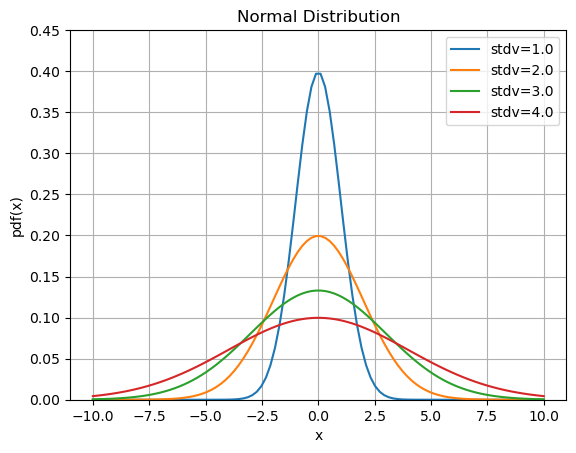

In [3]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

#### Histogram

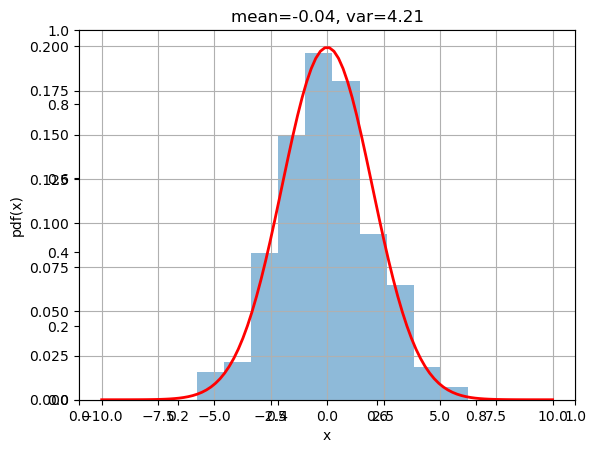

<Figure size 400x300 with 0 Axes>

In [8]:
fig, ax = plt.subplots()
xs = norm.rvs(scale=2,size=1000)
x = np.linspace(-10,10,100)
p = norm.pdf(x,scale=2)
v = np.var(xs)
m = np.mean(xs)
ax = fig.add_subplot(111)
ax.hist(xs, bins=10, alpha=0.5, density=True)
ax.plot(x,p, 'r-', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title(f'mean={m:.2f}, var={v:.2f}')
plt.figure(figsize=(4, 3))
ax.grid(True)

#### Several classic distributions

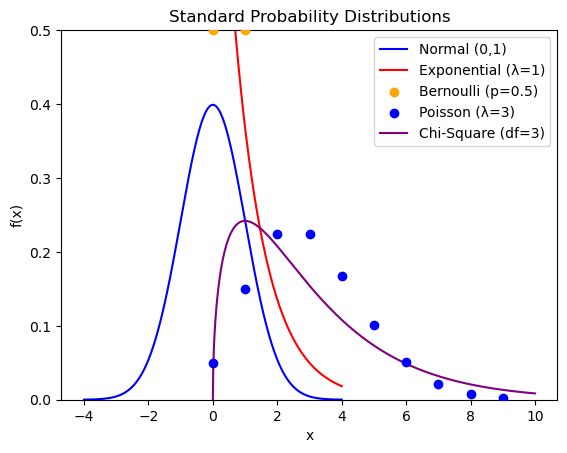

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, poisson, chi2, uniform, expon

fig, ax = plt.subplots()
x = np.arange(-4, 4, 0.001)

# Plot Normal Distribution
ax.plot(x, norm.pdf(x), label='Normal (0,1)', color='blue')

# Plot Exponential Distribution (shifted to center)
x_exp = np.arange(0, 4, 0.001)
ax.plot(x_exp, expon.pdf(x_exp), label='Exponential (λ=1)', color='red')

# Plot Bernoulli Distribution
x_bern = [0, 1]
y_bern = bernoulli.pmf(x_bern, 0.5)
ax.scatter(x_bern, y_bern, label='Bernoulli (p=0.5)', color='orange', zorder=3)

# Plot Poisson Distribution
x_pois = np.arange(0, 10, 1)
y_pois = poisson.pmf(x_pois, mu=3)
ax.scatter(x_pois, y_pois, label='Poisson (λ=3)', color='blue', zorder=3)

# Plot Chi-Square Distribution with df=3
x_chi2 = np.arange(0, 10, 0.01)
ax.plot(x_chi2, chi2.pdf(x_chi2, df=3), label='Chi-Square (df=3)', color='purple')

# Labels and title
ax.set_title('Standard Probability Distributions')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_ylim(0, 0.5)
ax.legend()

# Show plot
plt.show()

#### Cumulative normal distribution

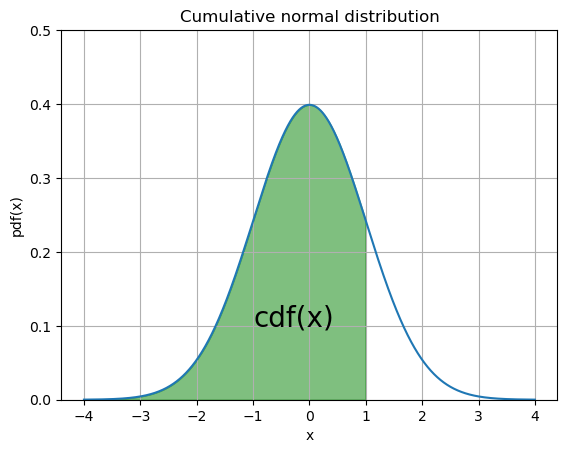

<Figure size 400x300 with 0 Axes>

In [7]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Cumulative normal distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
# for text
ax.text(-1,0.1,"cdf(x)", fontsize=20)
#plt.figure(figsize=(8, 6))
plt.figure(figsize=(4, 3))
plt.show()

#### Calculating the probability of normal distribution

In [2]:
from scipy.stats import norm
less_than_2=norm.cdf(x=2, loc=3, scale=2)
print("CDF less_than_2=", less_than_2)

CDF less_than_2= 0.3085375387259869


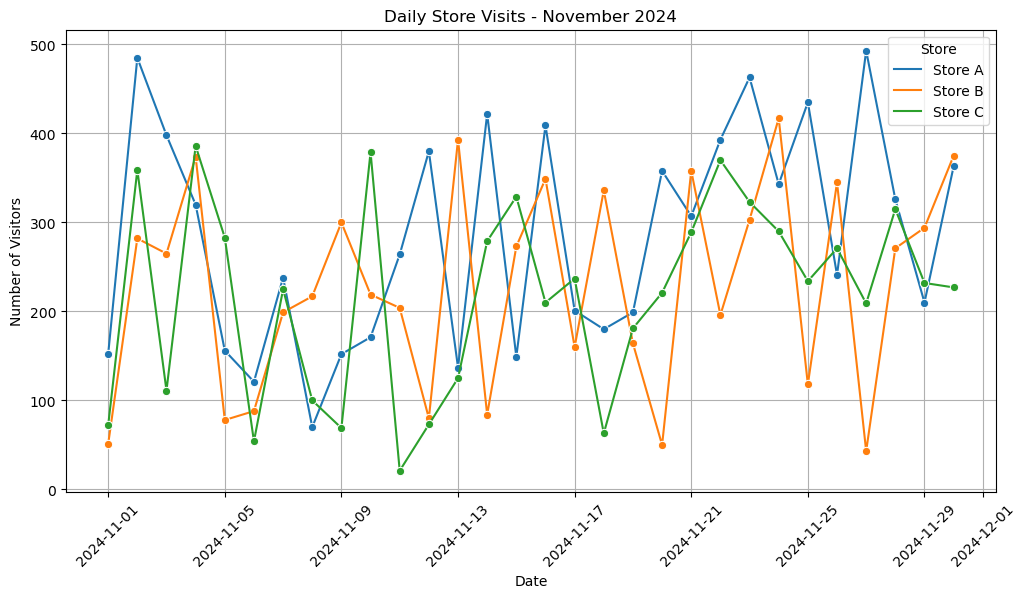

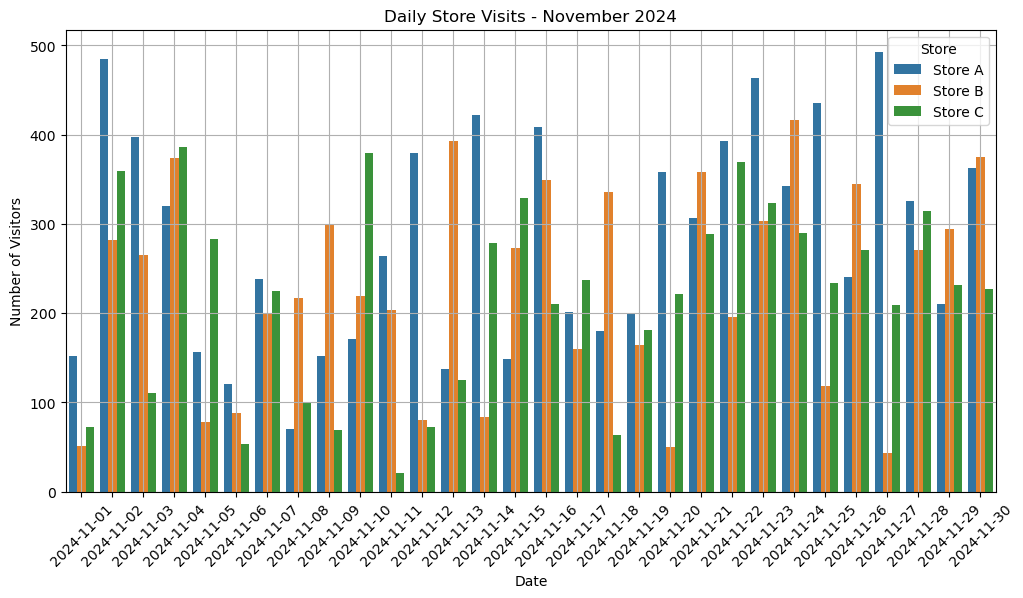

Basic Statistics:
           Store A     Store B     Store C
count   30.000000   30.000000   30.000000
mean   284.533333  229.533333  217.900000
std    122.816862  116.183485  108.536455
min     70.000000   43.000000   21.000000
25%    173.250000  128.500000  114.500000
50%    285.500000  242.000000  229.500000
75%    389.750000  327.750000  289.750000
max    493.000000  417.000000  386.000000

Correlation Matrix:
           Store A   Store B   Store C
Store A  1.000000 -0.021579  0.371378
Store B -0.021579  1.000000  0.230845
Store C  0.371378  0.230845  1.000000


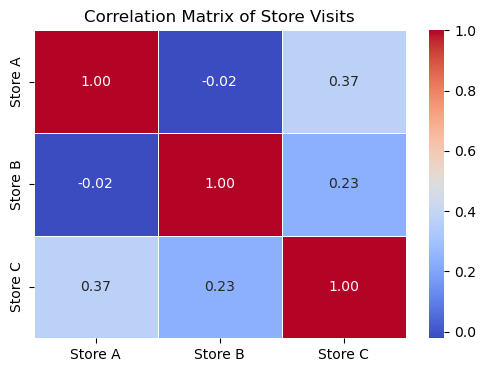

In [20]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate dates for November 2024
dates = pd.date_range(start='2024-11-01', end='2024-11-30', freq='D')

# Generate random visit counts for three stores
store_a_visits = np.random.randint(50, 500, size=len(dates))
store_b_visits = np.random.randint(30, 450, size=len(dates))
store_c_visits = np.random.randint(20, 400, size=len(dates))

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Store A': store_a_visits,
    'Store B': store_b_visits,
    'Store C': store_c_visits
})

# Melt DataFrame for Seaborn
df_melted = df.melt(id_vars=['Date'], var_name='Store', value_name='Visitors')

# Plot time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Date', y='Visitors', hue='Store', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.title('Daily Store Visits - November 2024')
plt.xticks(rotation=45)
plt.legend(title='Store')
plt.grid(True)
plt.show()

# Plot time series as bars
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Date', y='Visitors', hue='Store')
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.title('Daily Store Visits - November 2024')
plt.xticks(ticks=range(len(dates)), labels=dates.strftime('%Y-%m-%d'), rotation=45)

plt.legend(title='Store')
plt.grid(True)
plt.show()

# Calculate basic statistics
stats = df.drop(columns=['Date']).describe()
print("Basic Statistics:\n", stats)

# Calculate correlations between time series
correlation_matrix = df.drop(columns=['Date']).corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Store Visits')
plt.show()


T-test result between Store A and Store B: Ttest_indResult(statistic=1.7818558749724378, pvalue=0.08000791968092091)


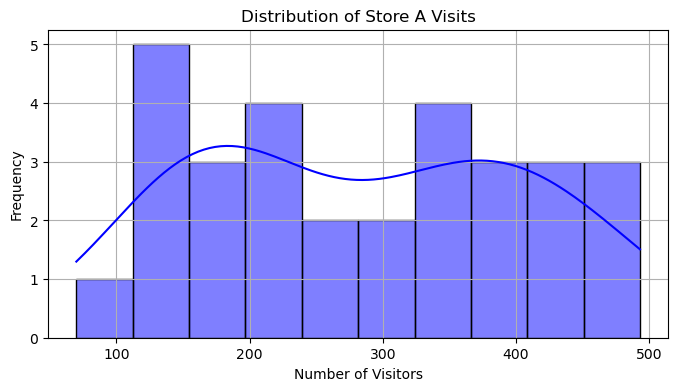

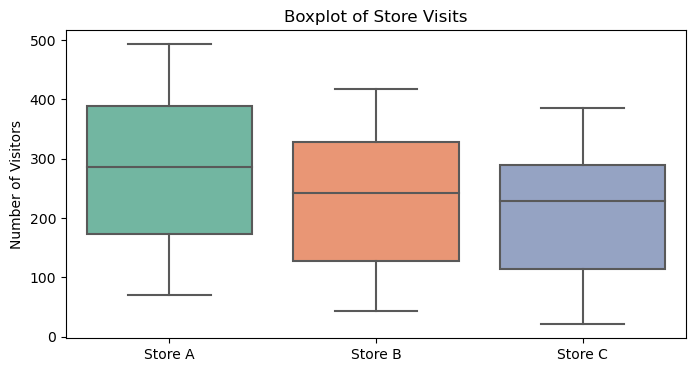

In [17]:
# Example usage of scipy.stats
from scipy import stats
store_a_mean = np.mean(store_a_visits)
store_b_mean = np.mean(store_b_visits)
store_c_mean = np.mean(store_c_visits)

# Perform a t-test between Store A and Store B
ttest_result = stats.ttest_ind(store_a_visits, store_b_visits)
print("\nT-test result between Store A and Store B:", ttest_result)

# Plot histogram of visits for Store A
plt.figure(figsize=(8, 4))
sns.histplot(store_a_visits, bins=10, kde=True, color='blue')
plt.title('Distribution of Store A Visits')
plt.xlabel('Number of Visitors')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot for comparison
plt.figure(figsize=(8, 4))
sns.boxplot(data=df.drop(columns=['Date']), palette='Set2')
plt.title('Boxplot of Store Visits')
plt.ylabel('Number of Visitors')
plt.show()

####   https://towardsdatascience.com/exploring-normal-distribution-with-jupyter-notebook-3645ec2d83f8

####   https://karliris62.medium.com/probability-distribution-through-python-code-data-science-in-experiment-299ac949d342

#### Scipy Stat https://docs.scipy.org/doc/scipy/tutorial/stats.html

In [12]:
# There are > 120 distributions in SciPy
# https://towardsdatascience.com/probability-distributions-with-pythons-scipy-3da89bf60565

from scipy import stats
dist_continu = [d for d in dir(stats) if
                isinstance(getattr(stats, d), stats.rv_continuous)]
dist_discrete = [d for d in dir(stats) if
                 isinstance(getattr(stats, d), stats.rv_discrete)]
print('scipy.stat: number of continuous distributions: %d' % len(dist_continu))
print('scipy.stat: number of discrete distributions:   %d' % len(dist_discrete))

scipy.stat: number of continuous distributions: 107
scipy.stat: number of discrete distributions:   19


#### https://github.com/Probability-Statistics-Jupyter-Notebook/probability-statistics-notebook/tree/master

#### Statsmodels https://www.statsmodels.org/   

Inplements regression, linear models, time series analysis, extensions to topics also covered by scipy.stats.

#### https://medium.com/geekculture/an-overview-of-11-classic-time-series-forecasting-methods-in-statsmodels-bc7728f657f4

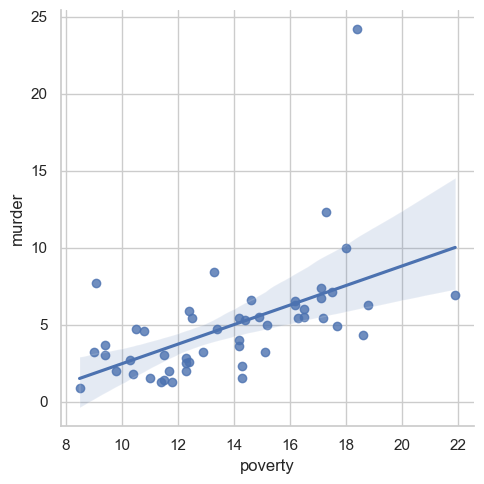

In [11]:
import statsmodels.api as sm
data = sm.datasets.statecrime.load_pandas().data

import seaborn as sns
sns.set(style = "whitegrid")
fig = sns.lmplot(x="poverty", y="murder", data=data)

#### Pomegranate https://pomegranate.readthedocs.io/